In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

%matplotlib inline

In [2]:
# # Define the stock symbol
# stock_symbol = 'SBIN.NS'

In [3]:
# # Specify the date range
# start_date = '2021-01-01'
# end_date = '2022-12-31'

In [4]:
stock_data = pd.read_csv('SBIN.NS.csv',usecols=['Date','Close'])

In [5]:
# # Download the historical stock prices
# stock_data = yf.download(stock_symbol, start=start_date, end=end_date,interval='1d')

In [6]:
stock_data.head()

,Date,Close
0,2022-01-10,503.649994
1,2022-01-11,505.950012
2,2022-01-12,510.250000
3,2022-01-13,511.350006
4,2022-01-14,508.350006


In [7]:
stock_data.columns

Index(['Date', 'Close'], dtype='object')

In [8]:
stock_data.rename({'Date':'ds','Close':'y'},axis = 1, inplace=True)

In [9]:
# stock_data['Date'] = stock_data['Date'].dt.accessor ('%m-%d-%Y')

In [10]:
stock_data

,ds,y
0,2022-01-10,503.649994
1,2022-01-11,505.950012
2,2022-01-12,510.250000
3,2022-01-13,511.350006
4,2022-01-14,508.350006
...,...,...
245,2023-01-04,605.200012
246,2023-01-05,605.099976
247,2023-01-06,600.650024
248,2023-01-09,607.700012


In [11]:
# Updating the header
stock_data.columns=["ds","y"]
stock_data.head()
stock_data.describe()
stock_data.set_index('ds',inplace=True)

<AxesSubplot:xlabel='ds'>

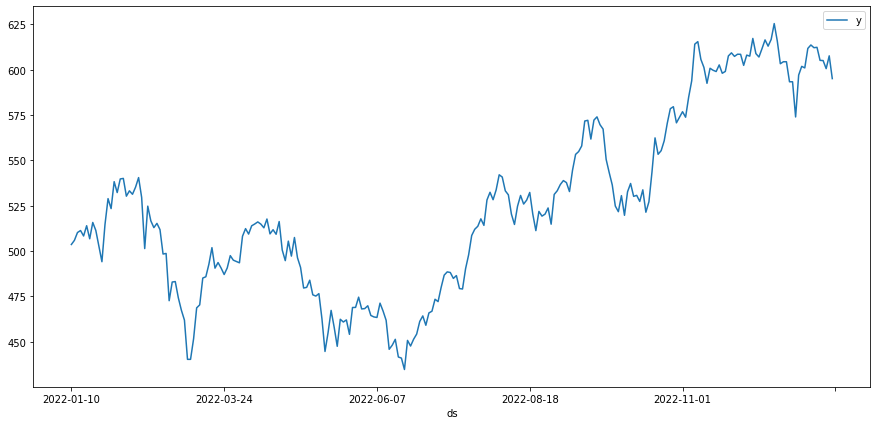

In [12]:
from pylab import rcParams
rcParams['figure.figsize'] = 15, 7
stock_data.plot()

In [13]:
from statsmodels.tsa.stattools import adfuller

In [14]:
test_result=adfuller(stock_data['y'])

In [15]:
def adfuller_test(close):
    result=adfuller(close)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )

    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data is stationary")
    else:
        print("weak evidence against null hypothesis,indicating it is non-stationary ")

adfuller_test(stock_data['y'])

ADF Test Statistic : -0.9824340043422017
p-value : 0.7596170588233042
#Lags Used : 0
Number of Observations : 249
weak evidence against null hypothesis,indicating it is non-stationary 


In [16]:
stock_data['Close First Difference'] = stock_data['y'] - stock_data['y'].shift(1)
stock_data['Seasonal First Difference']=stock_data['y']-stock_data['y'].shift(12)
stock_data.head()

,y,Close First Difference,Seasonal First Difference
ds,,,
2022-01-10,503.649994,NaN,NaN
2022-01-11,505.950012,2.300018,NaN
2022-01-12,510.250000,4.299988,NaN
2022-01-13,511.350006,1.100006,NaN
2022-01-14,508.350006,-3.000000,NaN


In [17]:
# Again testing if data is stationary
adfuller_test(stock_data['Seasonal First Difference'].dropna())

ADF Test Statistic : -3.181851398653528
p-value : 0.021059519867758968
#Lags Used : 12
Number of Observations : 225
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data is stationary


<AxesSubplot:xlabel='ds'>

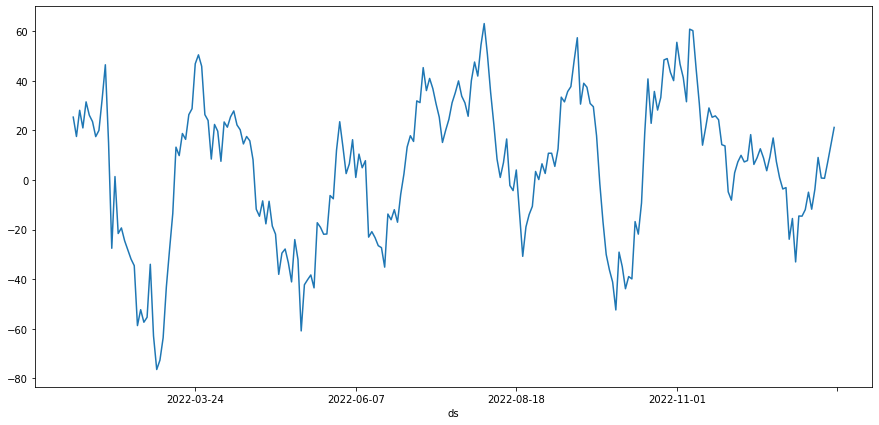

In [18]:
stock_data['Seasonal First Difference'].plot()

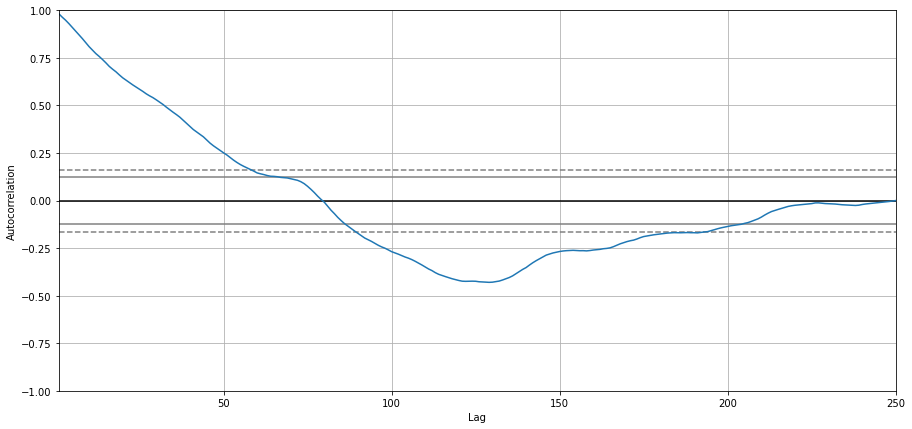

In [21]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(stock_data['y'])
plt.show()